In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#import the necessary libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

#read the movies file
df = pd.read_csv("/content/movies (1).csv")


#Intro

This is team 5's regression project. The goal is to analyze a dataset over 5000 rows long and perform a SEMMA analysis to then build a regression model.

The regression model that we will be using is a linear regression model. We will use several models and rank them according to accuracy.

#Sampling

This dataset is quite small and with the trimming we will perform to take care of missing values and outliers, this dataset will shrink even further. That is why we did not sample this dataset.


#Exploring

In this section we will be looking at our data, to get a better view about the data.

##Exploring the dataset

In [8]:
# First, let us look at the first 10 rows of the dataset.

df.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,...,in_germany,in_canada,in_france,in_australia,in_china,in_japan,release_date,on_holiday,gross_squared,year_squared
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,...,0,0,0,0,0,0,"Friday, June 13, 1980",0,2.208880e+15,3920400
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,...,0,0,0,0,0,0,"Wednesday, July 2, 1980",0,3.463690e+15,3920400
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,...,0,0,0,0,0,0,"Friday, June 20, 1980",0,2.898480e+17,3920400
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,...,0,0,0,0,0,0,"Wednesday, July 2, 1980",0,6.964490e+15,3920400
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,...,0,0,0,0,0,0,"Friday, July 25, 1980",0,1.587730e+15,3920400
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,...,0,0,0,0,0,0,"Friday, May 9, 1980",0,1.580430e+15,3920400
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,...,0,0,0,0,0,0,"Friday, June 20, 1980",0,1.327790e+16,3920400
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,...,0,0,0,0,0,0,"Friday, December 19, 1980",0,5.476740e+14,3920400
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,...,0,0,0,0,0,0,"Friday, June 19, 1981",0,1.170410e+16,3920400
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,...,0,0,0,0,0,0,"Friday, May 16, 1980",0,2.494880e+14,3920400


In [9]:
# Now, let us look at the different attributes in our table, accompanied with their datatypes.

df.dtypes

name                object
rating              object
genre               object
year                 int64
released            object
score              float64
votes              float64
director            object
writer              object
star                object
country             object
budget             float64
gross              float64
company             object
runtime            float64
famous_director      int64
famous_star          int64
famous_writer        int64
new_score            int64
runtime_squared      int64
budget_squared     float64
in_usa               int64
in_uk                int64
in_germany           int64
in_canada            int64
in_france            int64
in_australia         int64
in_china             int64
in_japan             int64
release_date        object
on_holiday           int64
gross_squared      float64
year_squared         int64
dtype: object

In [10]:
# So, as we can see, we are working with a couple of floats and integers. These are all valid to use for our 
# regression model. The variables that say object, we can transform some of them in later steps, to give more
# input to our model.

In [11]:
#let us look at the shape before we modify the dataset
df.shape

(7668, 33)

In [12]:
# Let us now see if we have any missing values and if we need to replace them with something.

print("Amount of missing data: " + str(df.isnull().sum().sum()))

# Let us now put the percentages per column of missing data per variable.
for x in df.columns:
    null_val = np.mean(df[x].isnull())
    print(f"{x} - {round(null_val*100)}%")

Amount of missing data: 2475
name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%
famous_director - 0%
famous_star - 0%
famous_writer - 0%
new_score - 0%
runtime_squared - 0%
budget_squared - 0%
in_usa - 0%
in_uk - 0%
in_germany - 0%
in_canada - 0%
in_france - 0%
in_australia - 0%
in_china - 0%
in_japan - 0%
release_date - 0%
on_holiday - 0%
gross_squared - 0%
year_squared - 0%


##Exploring the variables

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'votes'}>],
       [<Axes: title={'center': 'budget'}>,
        <Axes: title={'center': 'gross'}>],
       [<Axes: title={'center': 'score'}>,
        <Axes: title={'center': 'runtime'}>]], dtype=object)

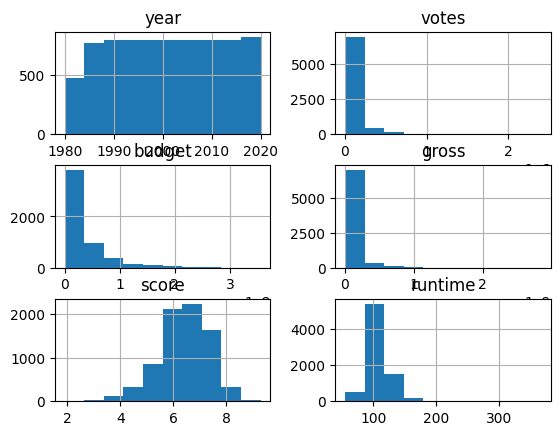

In [13]:
# Let us first visualize the individual numeric variables into some histograms and boxplots.
df[['year', 'votes', 'budget', 'gross', 'score', 'runtime']].hist()

<Axes: >

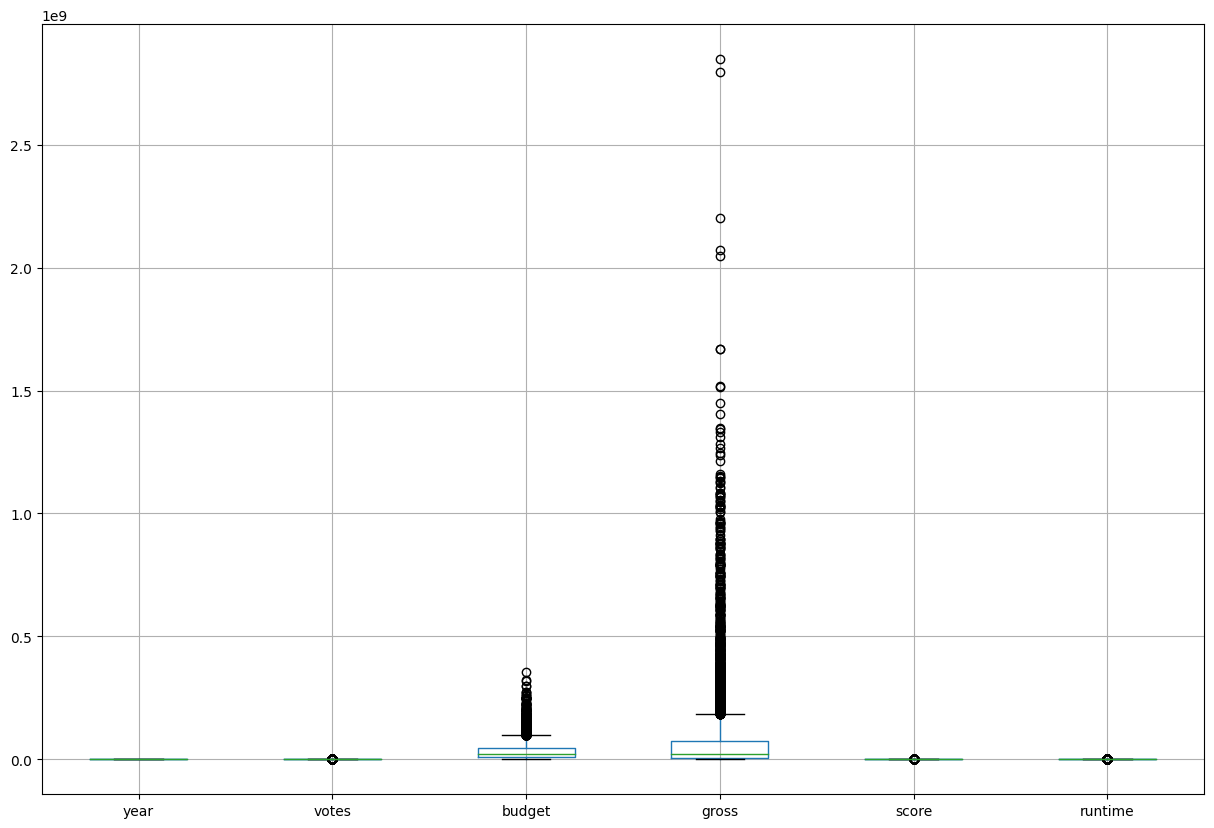

In [14]:
# As for the boxplots:
df[['year', 'votes', 'budget', 'gross', 'score', 'runtime']].boxplot(figsize=(15,10))

Looking at these visuals, we can see that the budget is fairly normally distributed but the other attributes contain some outliers and are mostly right-skewed. This will be something to look at in step 3.

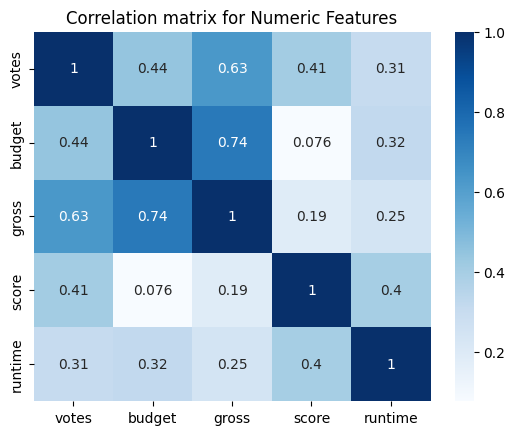

In [15]:
#We can also look at the correlation of just the features.
correlation_matrix = df[[ 'votes', 'budget', 'gross', 'score', 'runtime']].corr()

sns.heatmap(correlation_matrix, cmap="Blues", annot=True)

plt.title("Correlation matrix for Numeric Features")

plt.show()

First, we can see a big relation between gross and budget. The relation is positive which makes sense. The more budget a movie gets, the more gross revenue the movie gets. It is seldom seen that a movie of big stature does not perform well even if it is just to brake even. This is a good metric to include because it will allow the producers and companies to take more risks in terms of return on investment. 

Next, we see a very low and surprising relation between the year of the movie and the score it gets. This means that you can hardly predict the score given a certain year. As a team, we had our first hypothesis that the overal ratings of movies would increase but that is our own bias since we prefer movies of our time. This low relationship disproves our initial thoughts and shows us that no matter what year it is, good and bad scoring movies will be produced and released.

Lastly, a surprisingly low correlationg was found between the budget and the final score. The correlation is close to nothing, showing us that the amount of budget not a driving factor is of the final score a movie gets. This was surprising yet if we look at our previous observation, we can see the years and budget has a higher correlation showing us that with the years, the budget did go up. And if we already know that the year did not have an impact on the score, we can say the same about the amount of budget. Since these two correlate more.

In [16]:
#Let's sort the data by gross revenue to get a look at who is earning the most
df.sort_values(by=['gross', 'company'], inplace=False, ascending=False)

#We can see that Avatar has the highest gross revenue.

,name,rating,genre,year,released,score,votes,director,writer,star,...,in_germany,in_canada,in_france,in_australia,in_china,in_japan,release_date,on_holiday,gross_squared,year_squared
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,...,0,0,0,0,0,0,"Friday, December 18, 2009",0,8.106810e+18,4036081
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,...,0,0,0,0,0,0,"Friday, April 26, 2019",0,7.826010e+18,4076361
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,...,0,0,0,0,0,0,"Friday, December 19, 1997",0,4.847250e+18,3988009
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,...,0,0,0,0,0,0,"Friday, December 18, 2015",0,4.282920e+18,4060225
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,...,0,0,0,0,0,0,"Friday, April 27, 2018",0,4.195780e+18,4072324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5728,Saw: The Final Chapter,R,Crime,2010,NaN,5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,...,0,0,0,0,0,0,NaN,0,0.000000e+00,4040100
5730,The Wolfman,R,Drama,2010,NaN,5.8,104000.0,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,...,0,0,0,0,0,0,NaN,0,0.000000e+00,4040100
7662,The Robinsons,NaN,Action,2020,"November 10, 2020 (United States)",NaN,NaN,Directors,Aleks Alifirenko Jr.,Billy Hartmann,...,0,0,0,0,0,0,"Tuesday, November 10, 2020",0,0.000000e+00,4080400
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,...,0,0,0,0,0,0,"Friday, October 23, 2020",0,0.000000e+00,4080400


<Axes: xlabel='budget', ylabel='gross'>

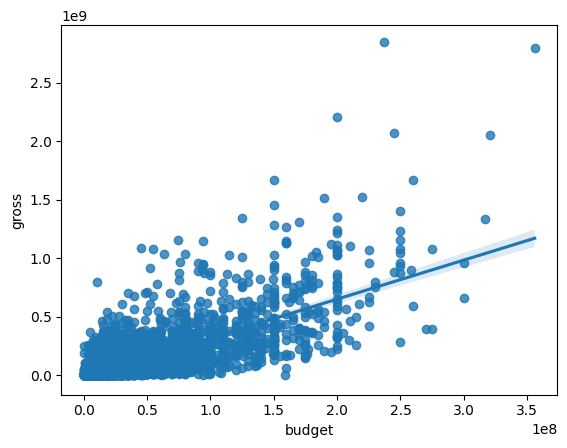

In [17]:
#We can now look at correlations. Let us look at the correlation between gross and budget.
sns.regplot(x="budget", y="gross", data=df)

# We can fairly easily conclude that there a direct correlation between gross and budget used, however, the more
# budget used, the more residual disperity.

# These residual outliers could be filtered out.

<Axes: xlabel='score', ylabel='gross'>

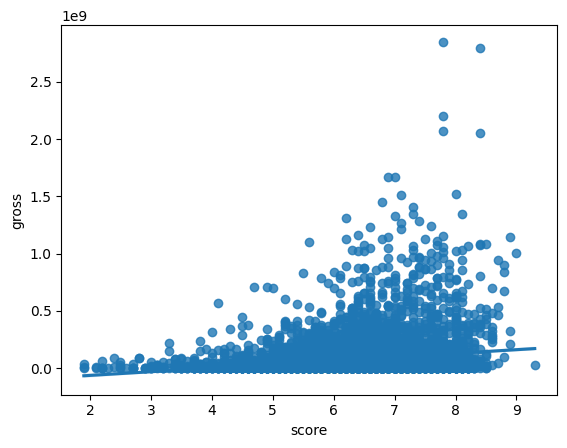

In [18]:
#Let us now do the same with the score and gross, 
#following our previous graph, the logical thing would be a linear direct correlation.
sns.regplot(x="score", y="gross", data=df)

# With this plot, we can see that there is a slight direct correlation with gross income and score.

<Axes: xlabel='budget', ylabel='score'>

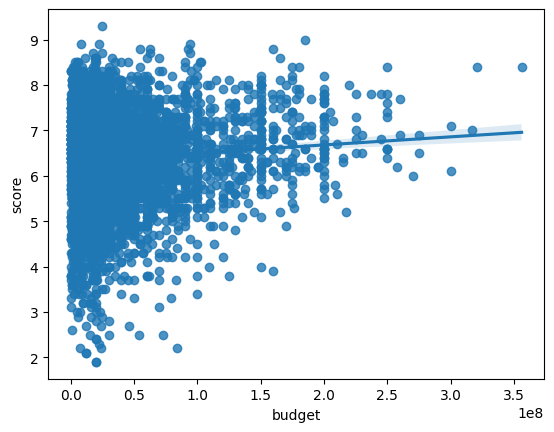

In [19]:
# As we did for the gross, we can now follow the budget and score.
sns.regplot(x="budget", y="score", data=df)

# With this plot, we can see that there is a slight direct correlation with budget output and score.
# However, we also see a lot more outliers here. This is good information for our data cleaning process.

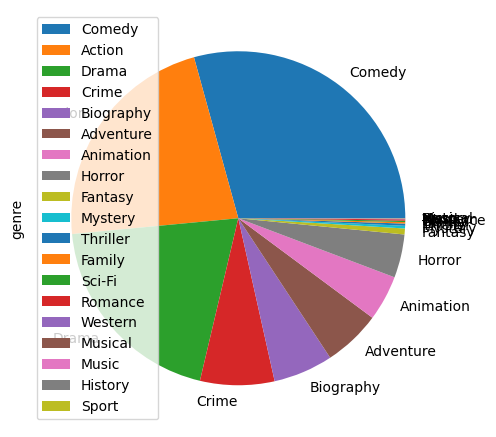

In [20]:
#let us look at the division of the dataset in the types of genres.
genre_count = df['genre'].value_counts()
genre_count.plot(kind='pie')
plt.legend(loc='center left')
plt.tight_layout()


#Modify 

We have now looked at our data in different ways. Let us now clean the data and delete some outliers.

##Deleting Duplicates and Missing Values


In [21]:
#We do not want any duplicates, so we will delete them.
print(df.shape)
df.drop_duplicates()
print(df.shape)
#we can see from the shape that there were no duplicates

(7668, 33)
(7668, 33)


In [22]:
df.shape

(7668, 33)

In [23]:
# Second, we will delete the missing values in the budget column and rating column, since we see a heavy correlation between budget and gross
# If we were to replace the missing values with the median, we would be changing the correlations a lot and thus creating a
# bias model.

df = df.dropna(axis = 0)
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,...,in_germany,in_canada,in_france,in_australia,in_china,in_japan,release_date,on_holiday,gross_squared,year_squared
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,...,0,0,0,0,0,0,"Friday, June 13, 1980",0,2.208880e+15,3920400
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,...,0,0,0,0,0,0,"Wednesday, July 2, 1980",0,3.463690e+15,3920400
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,...,0,0,0,0,0,0,"Friday, June 20, 1980",0,2.898480e+17,3920400
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,...,0,0,0,0,0,0,"Wednesday, July 2, 1980",0,6.964490e+15,3920400
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,...,0,0,0,0,0,0,"Friday, July 25, 1980",0,1.587730e+15,3920400


In [24]:
# IF we make a pivot table in excel about the countries, we can see that 95.89% of the movies are populated by 8 countries. We can keep these countries and add dummy variables for them.

#df = df[df["country"].isin(["United States", "United Kingdom", "Canada", "Australia", "France", "Germany", "China", "Japan"])]

In [25]:
# Let us now see if we have any missing values and if we need to replace them with something.

print("Amount of missing data: " + str(df.isnull().sum().sum()))

# Let us now put the percentages per column of missing data per variable.
for x in df.columns:
    null_val = np.mean(df[x].isnull())
    print(f"{x} - {round(null_val*100)}%")

df.shape

Amount of missing data: 0
name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%
famous_director - 0%
famous_star - 0%
famous_writer - 0%
new_score - 0%
runtime_squared - 0%
budget_squared - 0%
in_usa - 0%
in_uk - 0%
in_germany - 0%
in_canada - 0%
in_france - 0%
in_australia - 0%
in_china - 0%
in_japan - 0%
release_date - 0%
on_holiday - 0%
gross_squared - 0%
year_squared - 0%


(5421, 33)

##Changing types

In [26]:
#For the score, we have to multiply the whole column by ten in order to not lose our decimal after casting
df['score'] = df['score']*10

In [27]:
#next we change the types of some variables

df['famous_director'] = df['famous_director'].astype('category')
df['famous_writer'] = df['famous_writer'].astype('category')
df['famous_star'] = df['famous_star'].astype('category')
df['in_usa'] = df['in_usa'].astype('category')
df['in_uk'] = df['in_uk'].astype('category')
df['in_canada'] = df['in_canada'].astype('category')
df['in_germany'] = df['in_germany'].astype('category')
df['in_france'] = df['in_france'].astype('category')
df['in_australia'] = df['in_australia'].astype('category')
df['in_china'] = df['in_china'].astype('category')
df['in_japan'] = df['in_japan'].astype('category')

##Looking at Runtime

The mean of year was: 108.15273934698395
The mode of the year was: 0    101.0
Name: runtime, dtype: float64
The median of the year was: 105.0
The movie that started shooting earliest: 63.0
The movie that started shooting latest: 271.0


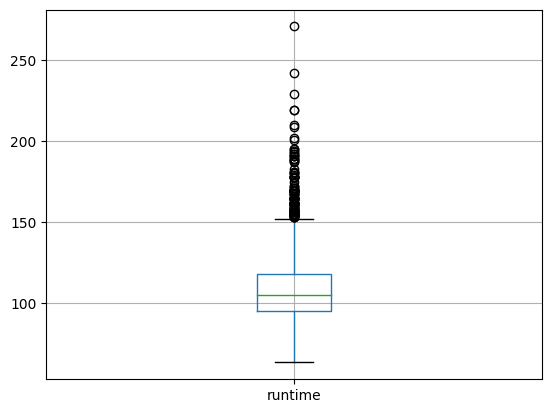

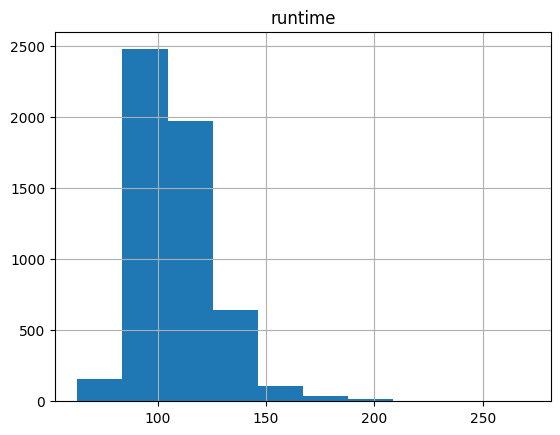

In [28]:
df.boxplot('runtime')
df.hist('runtime')

print("The mean of year was:", df['runtime'].mean())
print("The mode of the year was:", df['runtime'].mode())
print("The median of the year was:", df['runtime'].median())
print("The movie that started shooting earliest:", df['runtime'].min())
print("The movie that started shooting latest:", df['runtime'].max())

##Looking at Year

The mean of year was: 2001.6613171001661
The mode of the year was: 0    2002
Name: year, dtype: int64
The median of the year was: 2002.0
The movie that started shooting earliest: 1980
The movie that started shooting latest: 2020


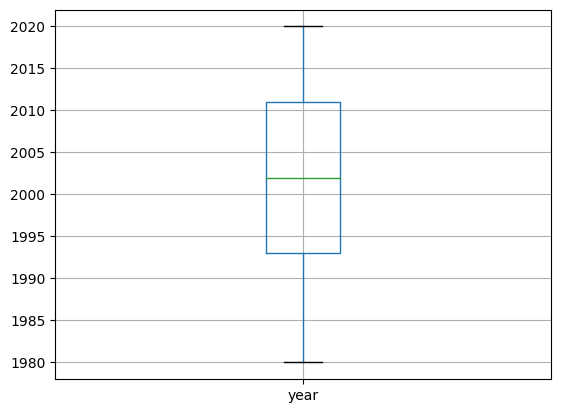

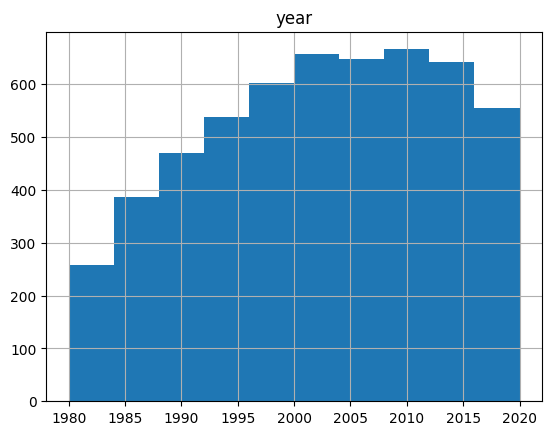

In [29]:
df.boxplot('year')
df.hist('year')

print("The mean of year was:", df['year'].mean())
print("The mode of the year was:", df['year'].mode())
print("The median of the year was:", df['year'].median())
print("The movie that started shooting earliest:", df['year'].min())
print("The movie that started shooting latest:", df['year'].max())

## Looking at Votes


The mean votes of movies was: 115066.12912746725
The mode of the votes was: 0    15000.0
Name: votes, dtype: float64
The median of the votes was: 52000.0
The minimun votes of a movie: 195.0
The maximuim votes of a movie: 2400000.0


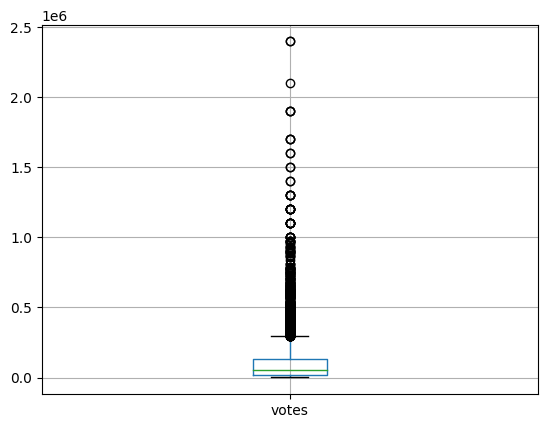

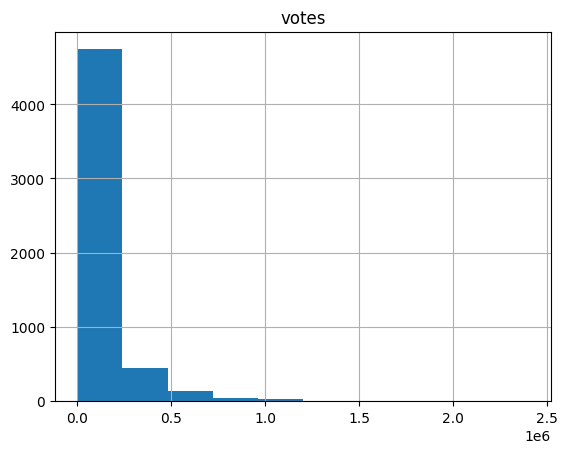

In [30]:
df.boxplot('votes')
df.hist('votes')

print("The mean votes of movies was:", df['votes'].mean())
print("The mode of the votes was:", df['votes'].mode())
print("The median of the votes was:", df['votes'].median())
print("The minimun votes of a movie:", df['votes'].min())
print("The maximuim votes of a movie:", df['votes'].max())

df = df[df['votes'] < 1000000]
df = df[df['votes'] > 10000]

##Looking at Score


The mean of budget is:64.8158302011939
The mode of budget is:0    66.0
Name: score, dtype: float64
The median of budget is:66.0
The min of budget is:19.0
The max of budget is:86.0


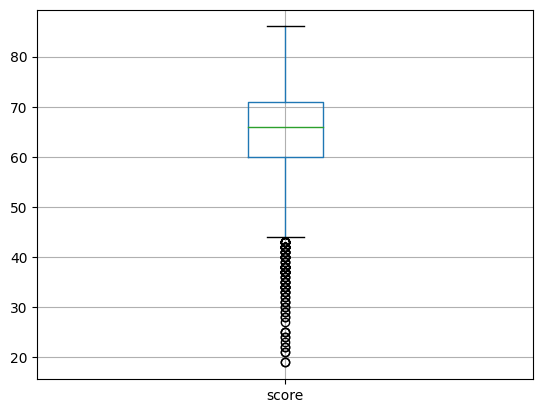

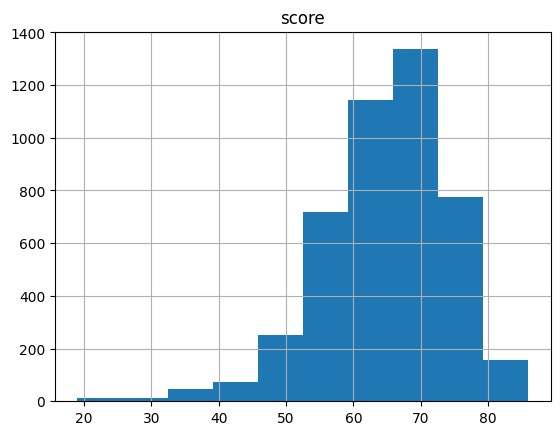

In [31]:
# Let us now look at values to exclude from our table.

df.boxplot('score')
df.hist('score')

print("The mean of budget is:" +  str(df['score'].mean()))
print("The mode of budget is:" +  str(df['score'].mode()))
print("The median of budget is:" +  str(df['score'].median()))
print("The min of budget is:" +  str(df['score'].min()))
print("The max of budget is:" +  str(df['score'].max()))


##Looking at Budget

The mean of budget is:39945720.92239664
The mode of budget is:0    30000000.0
Name: budget, dtype: float64
The median of budget is:25000000.0
The min of budget is:6000.0
The max of budget is:356000000.0


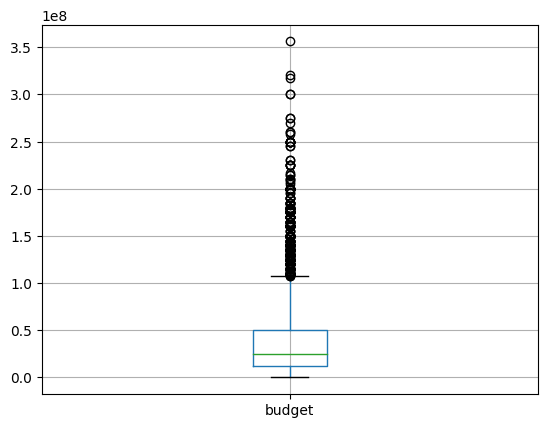

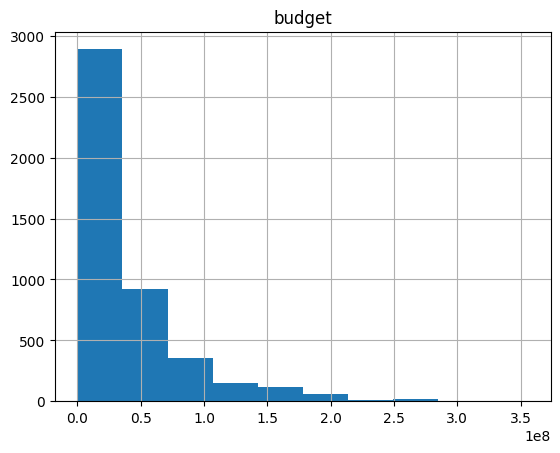

In [32]:
# Let us now look at values to exclude from our table.

df.boxplot('budget')
df.hist('budget')

print("The mean of budget is:" +  str(df['budget'].mean()))
print("The mode of budget is:" +  str(df['budget'].mode()))
print("The median of budget is:" +  str(df['budget'].median()))
print("The min of budget is:" +  str(df['budget'].min()))
print("The max of budget is:" +  str(df['budget'].max()))

df = df[df['budget'] < 290000000]
df = df[df['budget'] >100000]

## Looking at Gross

The mean of gross is:109.00955555555555
The mode of gross is:0    101.0
Name: runtime, dtype: float64
The median of gross is:106.0
The min of gross is:63.0
The max of gross is:271.0


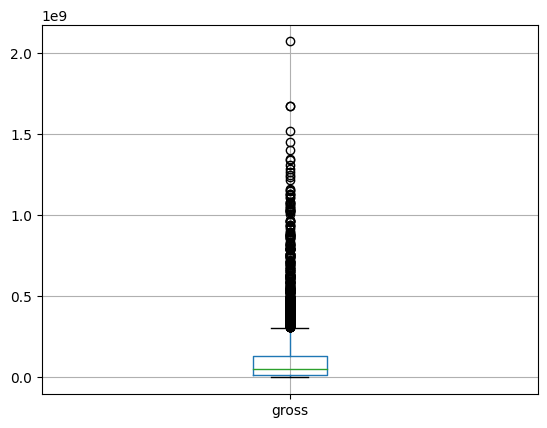

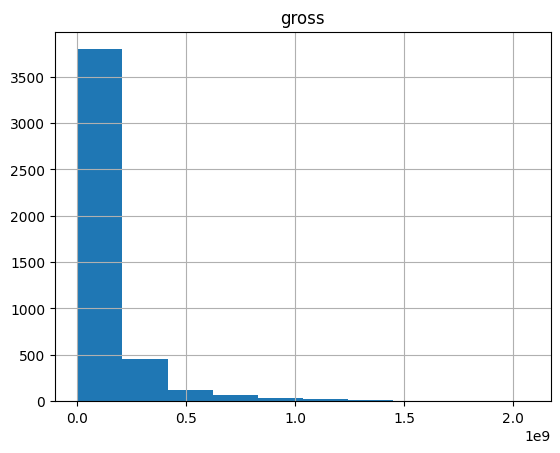

In [33]:
# Let us now look at values to exclude from our table.

df.boxplot('gross')
df.hist('gross')

print("The mean of gross is:" +  str(df['runtime'].mean()))
print("The mode of gross is:" +  str(df['runtime'].mode()))
print("The median of gross is:" +  str(df['runtime'].median()))
print("The min of gross is:" +  str(df['runtime'].min()))
print("The max of gross is:" +  str(df['runtime'].max()))

df = df[df['gross'] < 2000000000]
df = df[df['gross'] > 400000]

In [34]:
df['genre'].unique()

array(['Drama', 'Adventure', 'Comedy', 'Horror', 'Action', 'Biography',
       'Crime', 'Fantasy', 'Animation', 'Family', 'Sci-Fi', 'Romance',
       'Mystery', 'Thriller'], dtype=object)

## Adding Dummies


In [35]:
#We will add dummy columns to get more explanatory power.
dummies = pd.get_dummies(df['genre'])

df2 = pd.concat([df, dummies], axis='columns')
df2.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime', 'famous_director', 'famous_star', 'famous_writer',
       'new_score', 'runtime_squared', 'budget_squared', 'in_usa', 'in_uk',
       'in_germany', 'in_canada', 'in_france', 'in_australia', 'in_china',
       'in_japan', 'release_date', 'on_holiday', 'gross_squared',
       'year_squared', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 'Horror', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller'],
      dtype='object')

In [36]:
#We do it again but now for rating and company
dummies2 = pd.get_dummies(df2['rating'])
df3 = pd.concat([df2, dummies2], axis='columns')
df3.columns

dummies3 = pd.get_dummies(df3['company'])
df3 = pd.concat([df3, dummies3], axis='columns')
df3.columns

df3.shape

(4446, 1212)

##Looking at the changed relationships

<Axes: xlabel='score', ylabel='budget'>

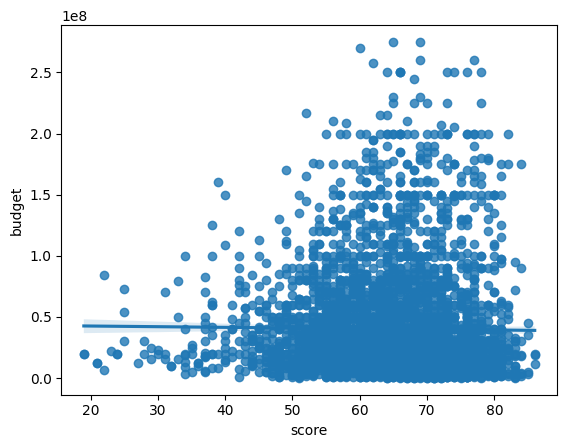

In [37]:
# As we did for the gross, we can now follow the budget and score.
sns.regplot(x="score", y="budget", data=df)

#After deleting outliers, we can see a slight negative relation. This means that the higher the budget the lower the score, however, it is that low that there will not be a noticable effect.

<Axes: xlabel='score', ylabel='gross'>

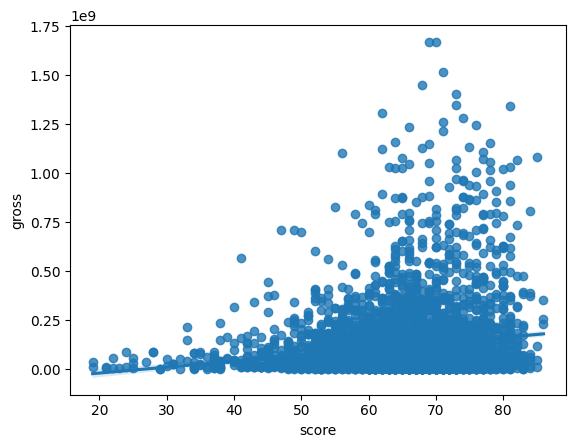

In [38]:
#Let us now do the same with the score and gross, 
#following our previous graph, the logical thing would be a linear direct correlation.
sns.regplot(x="score", y="gross", data=df)

#The correlation is higher now between score and gross, however still some outliers.

<Axes: xlabel='budget', ylabel='gross'>

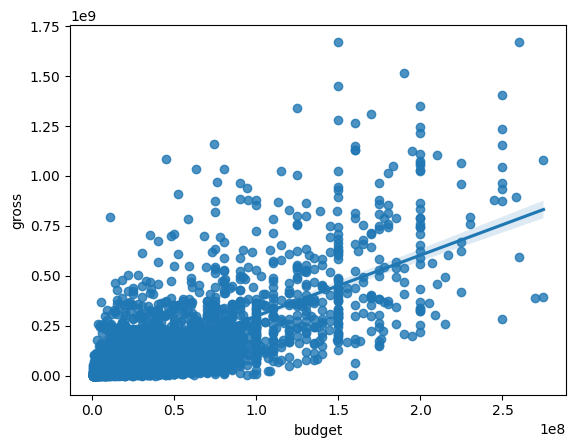

In [39]:
#We can now look at correlations. Let us look at the correlation between gross and budget.
sns.regplot(x="budget", y="gross", data=df)

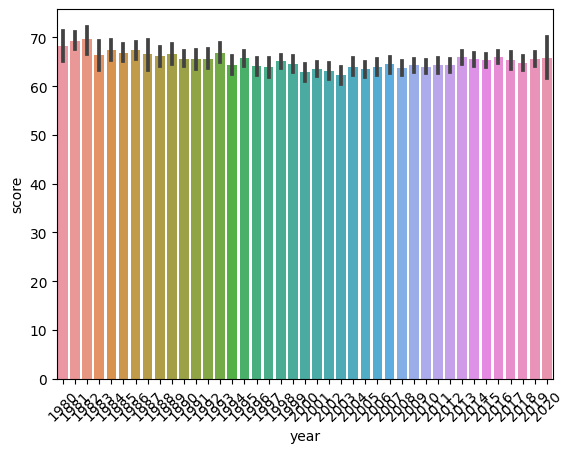

In [40]:
#Let us also look at the year vs score
sns.barplot(x="year", y="score", data=df)
plt.xticks(rotation=45)
plt.show()

#the year does not influence the score

In [41]:
#implement the logarithmic attributes because of the exponential relationships.
df3['log_runtime'] = np.log(df['runtime'])
df3['log_budget'] = np.log(df['budget'])
df3['log_gross'] = np.log(df['gross'])
df3['log_votes'] = np.log(df['votes'])


#Model 

We have now cleaned the data, looked at the data, and we can now conclude that we will be looking to predict the score and taking it as our target variable and the other feature attributes as our independant variables.


In [42]:
#import the model packages.
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [43]:
# First try with the filtered data
df['new_score'] = df['new_score'].astype('int')
features1 = df[['budget', 'year', 'gross', 'votes', 'runtime']]
labels1 = df[['new_score']]

train1, test1, train_labels1, test_labels1 = train_test_split(features1, labels1, test_size=0.2, random_state=42)


In [44]:
# Now let us try with added dummies
df2['score'] = df2['score'].astype('int')
features2 = df2[['budget', 'year', 'gross', 'votes', 'runtime', 'Crime',	'Drama',	'Family',	'Fantasy',	'Horror',	'Mystery',	'Romance',	'Sci-Fi',	'Thriller']]
labels2 = df2[['score']]

train2, test2, train_labels2, test_labels2 = train_test_split(features2, labels2, test_size=0.2, random_state=42)

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()

normalized_x_train2 = pd.DataFrame(
    scaler.fit_transform(train2),
    columns = train2.columns
)

normalized_x_test2 = pd.DataFrame(
    scaler.transform(test2),
    columns = test2.columns
)

df2['score']

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:3256: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:235: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


0       84
1       58
3       77
4       73
5       64
        ..
7646    71
7648    66
7649    65
7650    56
7651    68
Name: score, Length: 4446, dtype: int64

In [45]:
# Now let us see with even more dummmies a,d the famous attributes

df3['score'] = df3['score']
df3['score'] = df3['score'].astype('int')

features3 = df3[['budget', 'year', 'gross', 'votes', 'runtime','famous_star', 'famous_writer', 'famous_director','Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',	'Drama',	'Family',	'Fantasy',	'Horror',	'Mystery',	'Romance',	'Sci-Fi',	'Thriller', 'G', 'NC-17', 'Not Rated',
       'PG', 'PG-13', 'R', 'Unrated', 'X', 'in_usa', 'in_uk', 'in_canada', 'in_france', 'in_germany', 'in_china', 'in_australia', 'in_japan',  'on_holiday','log_runtime', 'log_budget', 'log_votes', 'log_gross']]
labels3 = df3[['score']]

train3, test3, train_labels3, test_labels3 = train_test_split(features3, labels3, test_size=0.30, random_state=42)

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer()

normalized_x_train3 = pd.DataFrame(
    scaler.fit_transform(train3),
    columns = train3.columns
)

normalized_x_test3 = pd.DataFrame(
    scaler.transform(test3),
    columns = test3.columns
)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:3256: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:235: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [46]:
#fit the model and get the score
lregression1 = LinearRegression()
lregression1.fit(train1, train_labels1)
Y_pred1 = lregression1.predict(test1)
acc_lregression1 = round(lregression1.score(test1, test_labels1) * 100, 2)
print(type(acc_lregression1))

print('model intercept :', lregression1.intercept_)
print('model coefficients : ', lregression1.coef_)
print('Model score : ', lregression1.score(train1, train_labels1))

<class 'numpy.float64'>
model intercept : [178.54010744]
model coefficients :  [[-6.23984682e-08 -6.62596615e-02  2.97270306e-10  3.03071490e-05
   1.62735544e-01]]
Model score :  0.35254536017072324


In [47]:
#fit the model and get the score
lregression2 = LinearRegression()
lregression2.fit(normalized_x_train2, train_labels2)
Y_pred2 = lregression2.predict(normalized_x_test2)
acc_lregression2 = round(lregression2.score(normalized_x_train2, train_labels2) * 100, 2)
print(type(acc_lregression2))

print('model intercept :', lregression2.intercept_)
print('model coefficients : ', lregression2.coef_)
print('Model score : ', lregression2.score(normalized_x_test2, test_labels2))

<class 'numpy.float64'>
model intercept : [64.86164229]
model coefficients :  [[-2.90531859 -1.06098034 -1.11317144  5.48839728  2.79014062  0.34858141
   0.47053521  0.08849607 -0.30549099 -1.26911089 -0.10357272  0.01650035
   0.02935709  0.08143271]]
Model score :  0.4877675568089139


model intercept : [64.88239074]
model coefficients :  [[ 3.10026494e+01 -1.22357158e+00  6.00390424e+01  1.84721096e+02
   2.28208470e+02 -1.09984594e-01  3.71282992e-01  8.24517374e-02
  -9.17077677e-01 -1.08364037e-01  1.83442683e+00  8.27991919e-01
  -2.36434680e-01  2.20131061e-01  3.46215061e-01 -3.95988654e-03
  -2.48439111e-01 -1.17193000e+00 -1.04126174e-01  4.58022008e-02
  -2.03531356e-02  1.15399065e-01  1.28762384e-01 -2.35479044e-01
  -1.46533891e-01  1.78300808e-02 -5.48170993e-01 -3.19484651e-01
  -3.01739008e-02  1.12900800e-11 -1.43971581e+00 -7.81018873e-01
  -6.66064459e-01 -3.12291701e-01 -5.84523684e-01  1.63729154e-01
  -2.63295563e-01 -1.91192278e-01  7.76842233e-02 -2.25093061e+02
  -3.38008273e+01 -1.78865736e+02 -6.17142745e+01]]
Model score :  0.5768327180164144


Text(0, 0.5, 'Predicted Score')

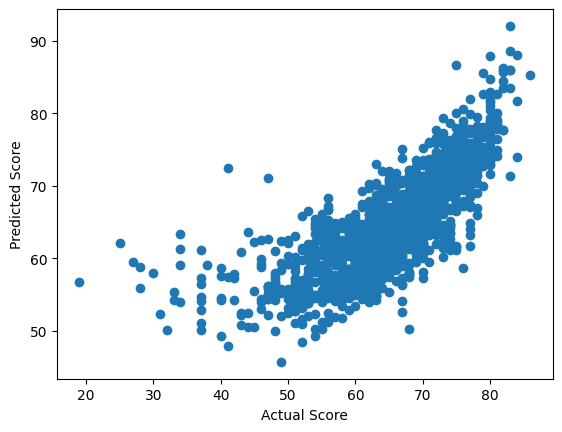

In [48]:
#fit the model and get the score
lregression3 = LinearRegression()
lregression3.fit(normalized_x_train3, train_labels3)
ypred3 = lregression3.predict(normalized_x_test3)
acc_lregression3 = round(lregression3.score(normalized_x_test3, test_labels3) * 100, 2)
acc_lregression3

print('model intercept :', lregression3.intercept_)
print('model coefficients : ', lregression3.coef_)
print('Model score : ', lregression3.score(normalized_x_test3, test_labels3))

#residual plot
plt.scatter(test_labels3, ypred3) #actual vs predicted
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')


<ipython-input-50-1fd3361dc608>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((test_labels3 - ypred3))


Text(0.5, 0, 'Residual Value')

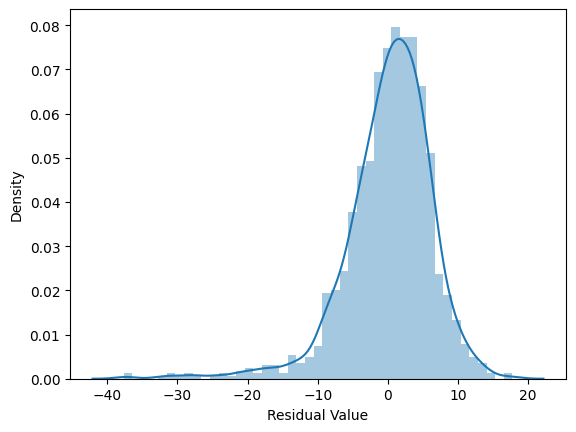

In [50]:
#Let us run a distplot to see the residuals better
sns.distplot((test_labels3 - ypred3
              ))
plt.xlabel('Residual Value')


In [51]:
#let us get a table to summarize the scores
models = pd.DataFrame({
    'Model': ['Linear Regression 1','Linear Regression 2', 'Linear Regression 3'],
    'Score': [acc_lregression1, acc_lregression2, acc_lregression3]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Linear Regression 3,57.68
1,Linear Regression 2,42.91
0,Linear Regression 1,38.59


#Recommendations


A producer can choose to go to the US or stay away from there. With 8 countries populating 95% of the whole industry, the US is the second-highest gross revenue generator but the second to last when it comes to average scoring.Having the vast majority populated with over 70%, this is to be taken with a grain of salt but for now, we would recommend going to the US because the probability of getting more profits there is considerably higher.

If you just released a movie, we would suggest investing some of the budget into marketing for feedback, since there is a big correlation between the amount of votes per movie and the gross a movie makes. Thus, for the future, we recommend spending a fair amount of the budget on marketing the movie, the duration of the movie and the feedback percentage. This could be done in the way of giving out gift cards to the people who leave a review or vote on the movie through IMDB. 

The most profitable genres to produce movies in on average is animation, family and action movies. These three genres overall make 3 times as much gross revenue as they invest. If you want to score better than the average, animation is the right option, scoring over 5% higher than the average. We would recommend staying away from musicals and sport movies since they tend to lose money on their movies. 





## Findings

We know that the gross revenue can be fairly certainly predicted by the amount of budget that is invested, the same thing cannot be said about the score that movie gets. This means that the probability that there might be more revenue if there was more budget spent, is higher than receiving a higher score.

From the point of view of a company, Marvel Studios earns around 1.25 Billion dollars per movie grossing the highest of over 1500 different competitors. That having said, the scores the movies get are also 10 percent higher than the average score, meaning both in gross and score they do better than the average competition.






In [ ]:
df.shape